In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob 
import os

Vamos determinar as imagens

In [33]:
# Caminho para a pasta "Imagem" dentro da pasta atual
caminho_imagem = os.path.join(os.getcwd(), 'Imagem')

# Busca todos os arquivos .jpg na pasta "Imagem"
img_names = glob.glob(os.path.join(caminho_imagem, '*.jpg'))

# Imprime os caminhos dos arquivos .jpg encontrados
print(img_names)

['/content/Imagem/img14.jpg', '/content/Imagem/img09.jpg', '/content/Imagem/img10.jpg', '/content/Imagem/img05.jpg', '/content/Imagem/img15.jpg', '/content/Imagem/img07.jpg', '/content/Imagem/img03.jpg', '/content/Imagem/img06.jpg', '/content/Imagem/img08.jpg', '/content/Imagem/img01.jpg', '/content/Imagem/img16.jpg', '/content/Imagem/img02.jpg', '/content/Imagem/img17.jpg', '/content/Imagem/img13.jpg']


Falta 3 parafusos
Falta 3 porcas


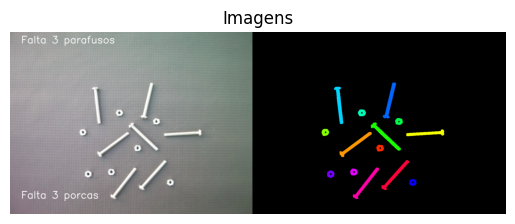

Falta 1 porcas


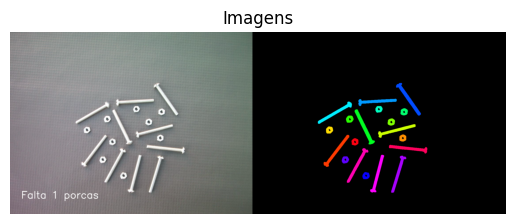

Falta 10 porcas


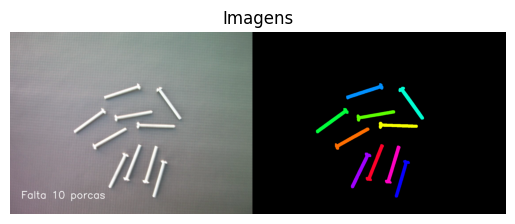

Falta 1 parafusos
Falta 1 porcas


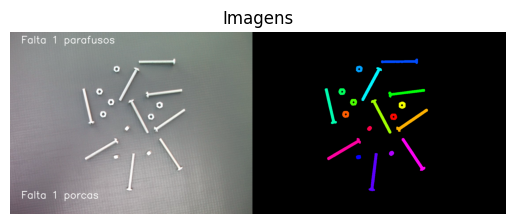

Conjunto Aprovado


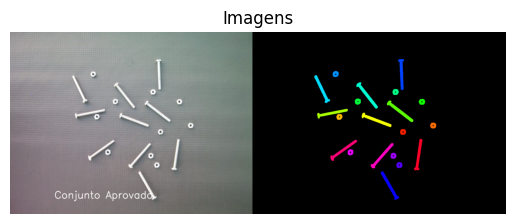

Falta 3 parafusos


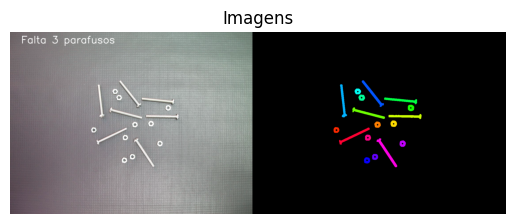

Conjunto Aprovado


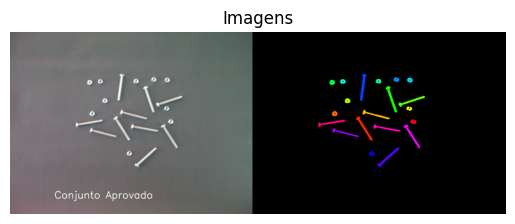

Conjunto Aprovado


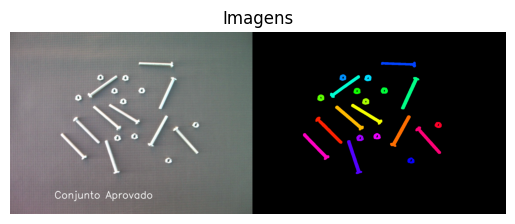

Conjunto Aprovado


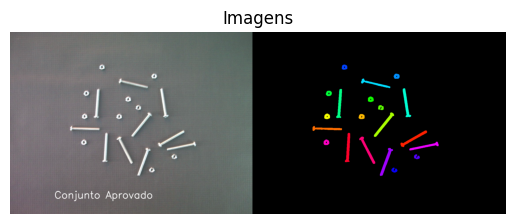

Conjunto Aprovado


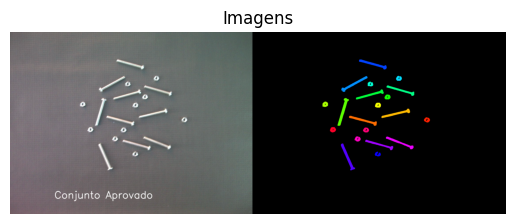

Falta 3 parafusos
Falta 1 porcas


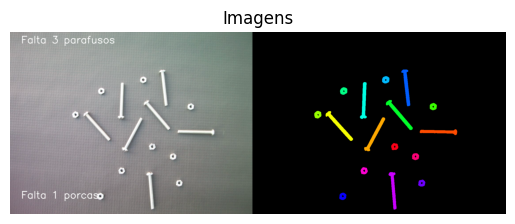

Conjunto Aprovado


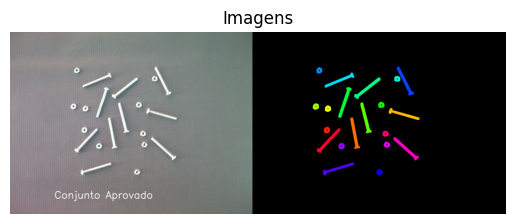

Conjunto Aprovado


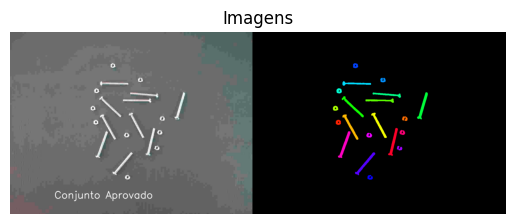

Conjunto Aprovado


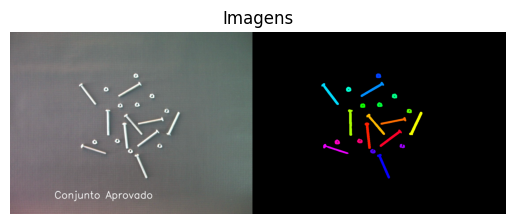

In [34]:
for fn in img_names:

  areas = list()

  img = cv2.imread(fn, 1)
  B, G, R = cv2.split(img)
  
  img_bil = cv2.bilateralFilter(G, 1, 90, 90)
  img_blur = cv2.blur(img_bil, (5,5))

  img_th = cv2.threshold(img_blur, 190, 255, cv2.THRESH_BINARY)[1]

  img_dilate = cv2.dilate(img_th, np.ones((4,4),np.uint8),
      iterations = 1)

  ## ATÉ AQUI, LEMOS E TORNAMOS AS IMAGENS MELHORES PARA APLICAR O ALGORITMO

  ## APLICAÇÃO DA FUNÇÃO cv2.connectedComponentsWithStats e formação de um DataFrame com seus datas
  numLabels, labels, stats, centroide = cv2.connectedComponentsWithStats(img_dilate, 8, cv2.CV_8U)
  areas.append(stats)

  areas.append(stats)
  df_areas = pd.DataFrame(areas[0], columns=['X', 'Y', 'W', 'H', 'AREA'])
  df_areas.drop(df_areas.index[0], inplace=True)
  parafusos = df_areas[df_areas['AREA'] > 900]
  porcas = df_areas[df_areas['AREA'] < 899]

  ## TRATAR AS IMAGENS (COLORIR, FUNDO PRETO)

  label_hue = np.uint8(179*labels/np.max(labels))
  blank_ch = 255*np.ones_like(label_hue)
  labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
  
  # Convertet HSV->BGR
  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
  
  # BG preto
  labeled_img[label_hue == 0] = 0
  
  qntd_elem = numLabels - 1
  
  flag = True
  font = cv2.FONT_HERSHEY_SIMPLEX
  
  if (len(parafusos) != 10) :
      print(f'Falta {abs(len(parafusos) - 10)} parafusos')
      cv2.putText(img, f'Falta {abs(len(parafusos) - 10)} parafusos',(50, 50), font, 1.5,(255,255,255),2,cv2.LINE_AA)
      flag = False        
      

  if (len(porcas) != 10) :
      print(f'Falta {abs(len(porcas) - 10)} porcas')
      cv2.putText(img, f'Falta {abs(len(porcas) - 10)} porcas',(50, 750), font, 1.5,(255,255,255),2,cv2.LINE_AA)
      flag = False        
      
  if flag == True:
      print('Conjunto Aprovado')
      cv2.putText(img, 'Conjunto Aprovado',(200, 750), font, 1.5,(255,255,255),2,cv2.LINE_AA) 
      
      

  img_concate = cv2.hconcat([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)])
  img_text = np.zeros((img_concate.shape[0], 50), dtype=np.uint8)
  imagem_total = cv2.hconcat([cv2.cvtColor(img_concate, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)])
  plt.imshow(imagem_total)
  plt.axis('off')
  plt.title("Imagens")
  plt.show()
